In [25]:
from CF_methods import *

# Test plot

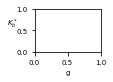

In [26]:
Large_font_size = 12
Medium_font_size = 7
Small_font_size = 5
lw = 1
text_kwargs = dict(ha='center', va='center', color='C1')

#setting figuresize - by default matplotlib uses inches
#size of A4 sheet - 
cm_ = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(figsize=(3*cm_, 2*cm_))
#ax.text(0.5, 1.5, f'Max font : {Large_font_size}pt', fontsize = Large_font_size, **text_kwargs)
#ax.text(0.5, 1.0, f'Med font : {Medium_font_size}pt', fontsize = Medium_font_size, **text_kwargs)
#ax.text(0.5, 0.5, f'Small font : {Small_font_size}pt', fontsize = Small_font_size, **text_kwargs)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel(r"$K_b^*$", fontsize = Medium_font_size, rotation = 0)
ax.set_xlabel("g", fontsize = Medium_font_size)

os.makedirs("plots", exist_ok=True)

fig.savefig("plots/test.pdf", bbox_inches = "tight")

# Import data
Import all the csv files available in `CephalicFurrow_theory/simulation_data/CF_mutant`

In [27]:
global_path_to_repo = "/Users/krishna/PhD/CephalicFurrow_theory/"
path_to_dfs = global_path_to_repo + "simulation_data/CF_mutant/dfs/"

group_K_g = pd.read_csv(path_to_dfs + "avg_prop_over_K_and_g_combination.csv")
grouped_df = pd.read_csv(path_to_dfs + "avg_prop_over_each_sim.csv")
df_energy_all = pd.read_csv(path_to_dfs + 'combined_energy.csv')
grouped_energy_df = pd.read_csv(path_to_dfs + "grouped_energy_df.csv")
mean_shape_at_maxBendEnergy = pd.read_csv(path_to_dfs + "mean_depth_along_curve_at_maxBendEnergy.csv")
#mean_shape_at_final = pd.read_csv(path_to_dfs + "mean_depth_along_curve_at_final.csv")
allSims_at_maxBendEnergy = pd.read_csv(path_to_dfs + "allSims_at_maxBendEnergy.csv")
allSims_at_final = pd.read_csv(path_to_dfs + "allSims_at_final.csv")


# Representative plots

iteration 0


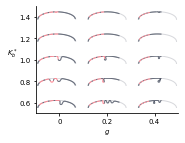

In [28]:
%matplotlib inline

seed = 10
np.random.seed(seed)

figsize = (6.5*cm_, 5*cm_)

#define the timepoint
#suffix = "_at_final"
suffix = "_at_maxBendEnergy"

#open pdf 
from matplotlib.backends.backend_pdf import PdfPages
pdf_doc = PdfPages("plots/CFM_K_vs_g_all_seeds" + suffix + ".pdf")


#define the conditions
rows_param = 'K'
cols_param = 'germ_band_push'

row_vals = np.flip(np.sort(np.unique(allSims_at_maxBendEnergy[rows_param])))[[0,2,4,6,8]]#[[10,8,6,4,2]] #2,4,6,8,10 #[1.4e-4, 1.2e-4, 1e-4, 0.8e-4, 0.6e-4 ]
col_vals = [0, 0.2, 0.4]#np.sort(np.unique(allSims_at_maxBendEnergy[cols_param]))
allSims_at_maxBendEnergy_filter = allSims_at_maxBendEnergy.query(f"{rows_param} in @row_vals and {cols_param} in @col_vals")#filter
allSims_at_maxBendEnergy_filter.loc[:,"plotted_boolean"] = 0



nb_seeds_per_cond = 1#20

for i in range(nb_seeds_per_cond):
    
    print("iteration",i)
    
    fig,axs = plt.subplots(len(row_vals), len(col_vals),
                           figsize = figsize #(5*len(col_vals), (10/3)*len(row_vals))
                          )


    main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
    main_ax.set_facecolor('none')

    #plt.xlabel('slope', fontsize = 60, labelpad = 80)
    #plt.xlabel(cols_param, fontsize = 40, labelpad = 30)
    plt.xlabel(r'$g$', fontsize = Medium_font_size, labelpad = Small_font_size/2)
    plt.ylabel(r'$K_b^*$', fontsize = Medium_font_size, labelpad = Medium_font_size, rotation = 0)
    # + "\n" + r"$(\times10^{-4})$"
    #plt.ylabel('thickness', fontsize = 60, labelpad = 80)

    plt.xlim(-0.5,len(col_vals) -0.5)
    plt.ylim(-0.5, len(row_vals) -0.5)


    #tick_intervals_x = [round(x,2) for x in col_vals]
    tick_intervals_x = col_vals
    tick_intervals_y = np.sort(row_vals) #[round(x,2) for x in row_vals]

    #tick_intervals_x_str = [str(round(x,3)) for x in col_vals]
    #tick_intervals_x_str = ['%.1E' % Decimal(str(x)) for x in col_vals]
    tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
    tick_intervals_y_str = [str(round(x/(1e-4),2)) for x in tick_intervals_y]

    plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = Medium_font_size, )#labelpad = Small_font_size/2)
    #plt.yticks(tick_intervals_x, [r'$8.5 \times 10^{-5}$', r'$1 \times 10^{-4}$', r'$1.15 \times 10^{-4}$'], fontsize = 16)
    plt.yticks(range(len(row_vals)), tick_intervals_y_str, fontsize = Medium_font_size, )#labelpad = Small_font_size/2)

    main_ax.tick_params(axis=u'both', which=u'both',length=Small_font_size/2, pad = Small_font_size/2)

    # Hide the right and top spines
    main_ax.spines['right'].set_visible(False)
    main_ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    main_ax.yaxis.set_ticks_position('left')
    main_ax.xaxis.set_ticks_position('bottom')

    #main_ax.set_title("t at " + suffix)

    for i in range(len(row_vals)):
        row_val = row_vals[i]
        for j in range(len(col_vals)):       
            col_val = col_vals[j]
            if (len(row_vals) > 1) & (len(col_vals) > 1):
                ax = axs[i,j]
            if (len(row_vals) == 1) & (len(col_vals) > 1):
                ax = axs[j]
            if (len(row_vals) > 1) & (len(col_vals) == 1):
                ax = axs[i]

            ax.axis("off")
            ax.set_aspect('equal')
            #select a seed
            paths = np.unique(allSims_at_maxBendEnergy_filter.query(f"{rows_param} == @row_val and {cols_param} == @col_val and plotted_boolean == 0")["path"].values)#allSims_at_maxBendEnergy[((allSims_at_maxBendEnergy["K"] == K) & (allSims_at_maxBendEnergy["germ_band_push"] == germ_band_push)) & (allSims_at_maxBendEnergy["nb_folds" + suffix] == round(nb_folds_mean))]["path"].values
            if len(paths) == 0:
                print(f"No sim for {rows_param} == {row_val} and {cols_param} == {col_val}")
                continue
            chosen_path = np.random.choice(paths)
            allSims_at_maxBendEnergy_filter.loc[allSims_at_maxBendEnergy_filter["path"] == chosen_path,"plotted_boolean"] = 1
            #print(path)
            df_timepoint = allSims_at_maxBendEnergy_filter[allSims_at_maxBendEnergy_filter["path"] == chosen_path]#pd.read_csv(path + "balls_w_fold_analysis" + suffix + ".csv")
            #plot
            #plot vitelline membrane
            thetas = np.linspace(0, np.pi, 1000)
            vit_x = np.cos(thetas)
            vit_y = 0.4*np.sin(thetas)
            ax.plot(1.02*vit_x, 1.02*vit_y, lw = lw, alpha = 1, color = "#d7d8dc", zorder = 0)
            #plot segments
            points_1 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[:-1]
            points_2 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[1:]
            #create a collection of lines
            segments_demo = np.concatenate([points_1, points_2], axis = 1)
            #value by which to color lines
            #dydx = df_timepoint["d_r_mod"][:-1]/df_timepoint["dr0"][:-1]
            colors = np.where(df_timepoint["mitotic_domain_id"] == -1, "#373f51", "#ff6978")
            #make line collection
            #lc = LineCollection(segments_demo, array = dydx,cmap=cmap, norm=norm,alpha = alpha,lw = lw,)
            lc = LineCollection(segments_demo, colors =colors,alpha = 1,linewidths=lw)
            line = ax.add_collection(lc)
            #ax.text(x = 0, y = 0.6, s = "seed = "+str(allSims_at_maxBendEnergy_filter.loc[chosen_ind, "seed"]), )

    #fig.tight_layout()
    pdf_doc.savefig(fig, bbox_inches = "tight")

pdf_doc.close()


iteration 0


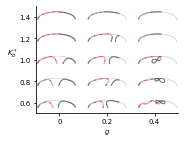

In [29]:
%matplotlib inline

seed = 0
np.random.seed(seed)

figsize = (6.5*cm_, 5*cm_)

#define the timepoint
#suffix = "_at_final"
suffix = "_at_final"

#open pdf 
from matplotlib.backends.backend_pdf import PdfPages
pdf_doc = PdfPages("plots/CFM_K_vs_g_all_seeds" + suffix + ".pdf")


#define the conditions
rows_param = 'K'
cols_param = 'germ_band_push'

row_vals = np.flip(np.sort(np.unique(allSims_at_final[rows_param])))[[0,2,4,6,8]]#[[10,8,6,4,2]] #2,4,6,8,10 #[1.4e-4, 1.2e-4, 1e-4, 0.8e-4, 0.6e-4 ]
col_vals = [0, 0.2, 0.4]#np.sort(np.unique(allSims_at_final[cols_param]))
allSims_at_final_filter = allSims_at_final.query(f"{rows_param} in @row_vals and {cols_param} in @col_vals")#filter
allSims_at_final_filter.loc[:,"plotted_boolean"] = 0



nb_seeds_per_cond = 1#20

for i in range(nb_seeds_per_cond):
    
    print("iteration",i)
    
    fig,axs = plt.subplots(len(row_vals), len(col_vals),
                           figsize = figsize #(5*len(col_vals), (10/3)*len(row_vals))
                          )


    main_ax = fig.add_subplot(111, frameon=True, alpha = 0.5)
    main_ax.set_facecolor('none')

    #plt.xlabel('slope', fontsize = 60, labelpad = 80)
    #plt.xlabel(cols_param, fontsize = 40, labelpad = 30)
    plt.xlabel(r'$g$', fontsize = Medium_font_size, labelpad = Small_font_size/2)
    plt.ylabel(r'$K_b^*$', fontsize = Medium_font_size, labelpad = Medium_font_size, rotation = 0)
    # + "\n" + r"$(\times10^{-4})$"
    #plt.ylabel('thickness', fontsize = 60, labelpad = 80)

    plt.xlim(-0.5,len(col_vals) -0.5)
    plt.ylim(-0.5, len(row_vals) -0.5)


    #tick_intervals_x = [round(x,2) for x in col_vals]
    tick_intervals_x = col_vals
    tick_intervals_y = np.sort(row_vals) #[round(x,2) for x in row_vals]

    #tick_intervals_x_str = [str(round(x,3)) for x in col_vals]
    #tick_intervals_x_str = ['%.1E' % Decimal(str(x)) for x in col_vals]
    tick_intervals_x_str = [str(round(x,2)) for x in tick_intervals_x]
    tick_intervals_y_str = [str(round(x/(1e-4),2)) for x in tick_intervals_y]

    plt.xticks(range(len(col_vals)), tick_intervals_x_str, fontsize = Medium_font_size, )#labelpad = Small_font_size/2)
    #plt.yticks(tick_intervals_x, [r'$8.5 \times 10^{-5}$', r'$1 \times 10^{-4}$', r'$1.15 \times 10^{-4}$'], fontsize = 16)
    plt.yticks(range(len(row_vals)), tick_intervals_y_str, fontsize = Medium_font_size, )#labelpad = Small_font_size/2)

    main_ax.tick_params(axis=u'both', which=u'both',length=Small_font_size/2, pad = Small_font_size/2)

    # Hide the right and top spines
    main_ax.spines['right'].set_visible(False)
    main_ax.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    main_ax.yaxis.set_ticks_position('left')
    main_ax.xaxis.set_ticks_position('bottom')

    #main_ax.set_title("t at " + suffix)

    for i in range(len(row_vals)):
        row_val = row_vals[i]
        for j in range(len(col_vals)):       
            col_val = col_vals[j]
            if (len(row_vals) > 1) & (len(col_vals) > 1):
                ax = axs[i,j]
            if (len(row_vals) == 1) & (len(col_vals) > 1):
                ax = axs[j]
            if (len(row_vals) > 1) & (len(col_vals) == 1):
                ax = axs[i]

            ax.axis("off")
            ax.set_aspect('equal')
            #select a seed
            paths = np.unique(allSims_at_final_filter.query(f"{rows_param} == @row_val and {cols_param} == @col_val and plotted_boolean == 0")["path"].values)#allSims_at_final[((allSims_at_final["K"] == K) & (allSims_at_final["germ_band_push"] == germ_band_push)) & (allSims_at_final["nb_folds" + suffix] == round(nb_folds_mean))]["path"].values
            if len(paths) == 0:
                print(f"No sim for {rows_param} == {row_val} and {cols_param} == {col_val}")
                continue
            chosen_path = np.random.choice(paths)
            allSims_at_final_filter.loc[allSims_at_final_filter["path"] == chosen_path,"plotted_boolean"] = 1
            #print(path)
            df_timepoint = allSims_at_final_filter[allSims_at_final_filter["path"] == chosen_path]#pd.read_csv(path + "balls_w_fold_analysis" + suffix + ".csv")
            #plot
            #plot vitelline membrane
            thetas = np.linspace(0, np.pi, 1000)
            vit_x = np.cos(thetas)
            vit_y = 0.4*np.sin(thetas)
            ax.plot(1.02*vit_x, 1.02*vit_y, lw = lw, alpha = 1, color = "#d7d8dc", zorder = 0)
            #plot segments
            points_1 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[:-1]
            points_2 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[1:]
            #create a collection of lines
            segments_demo = np.concatenate([points_1, points_2], axis = 1)
            #value by which to color lines
            #dydx = df_timepoint["d_r_mod"][:-1]/df_timepoint["dr0"][:-1]
            colors = np.where(df_timepoint["mitotic_domain_id"] == -1, "#373f51", "#ff6978")
            #make line collection
            #lc = LineCollection(segments_demo, array = dydx,cmap=cmap, norm=norm,alpha = alpha,lw = lw,)
            lc = LineCollection(segments_demo, colors =colors,alpha = 1,linewidths=lw)
            line = ax.add_collection(lc)
            #ax.text(x = 0, y = 0.6, s = "seed = "+str(allSims_at_final_filter.loc[chosen_ind, "seed"]), )

    #fig.tight_layout()
    pdf_doc.savefig(fig, bbox_inches = "tight")

pdf_doc.close()


# Number of folds - parameter sweep

In [30]:
suffix = "_at_maxBendEnergy"
av_folds_pv = group_K_g.pivot(index="K", columns="germ_band_push", values="nb_folds"+suffix)
av_folds_pv = av_folds_pv.sort_index(ascending = False)
x = av_folds_pv.columns
y = av_folds_pv.index.values
Z = av_folds_pv.values

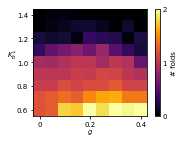

In [31]:
figsize = (6.5*cm_, 5*cm_)
cmap = plt.get_cmap('inferno')
norm = matplotlib.colors.Normalize(vmin=0, vmax=2)#BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, ax = plt.subplots(figsize = figsize)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size, pad = Small_font_size/2, length = Small_font_size/2)
im = ax.pcolormesh(x, y, Z, cmap=cmap, norm=norm, shading = "auto")
cbar = fig.colorbar(im, ax=ax,)
#ax.set_yticks()
yticks = np.array([0.6,0.8,1,1.2,1.4])*1e-4
xticks = [0,0.2,0.4]
ax.set_yticks(yticks)
_=ax.set_yticklabels([np.round(x/(1e-4),2) for x in yticks],)
ax.set_xticks(xticks)
_=ax.set_xticklabels([np.round(x,1) for x in xticks],)

cbar.set_ticks([0,1,2])
cbar.ax.tick_params(labelsize=Medium_font_size, length = Small_font_size/20, pad = Small_font_size/2)
_=ax.set_xlabel(r"$g$",fontsize = Medium_font_size, labelpad = Small_font_size/100)
_=ax.set_ylabel(r"$K_b^{*}$", fontsize = Medium_font_size, labelpad = Small_font_size, rotation = 0)
os.makedirs("plots/", exist_ok=True)
#ax.set_title("Nb folds", fontsize = Small_font_size)
cbar.ax.set_ylabel('# folds', rotation=90, fontsize = Medium_font_size)
plt.savefig("plots/CFM_Nb_folds.pdf", bbox_inches = "tight")

# Number of folds for $K_b^{*} = 10^{-4}$

What is the value of $K_b^{*}$ at which the mean number of folds is less than 1? - $K_b^{*} = 10^{-4}$

In [32]:
#compare with double mutant
#upload double mutant data

group_K_g_double_mutant = pd.read_csv(global_path_to_repo + "simulation_data/double_mutant/dfs/avg_prop_over_K_and_g_combination.csv")
grouped_df_double_mutant = pd.read_csv(global_path_to_repo + "simulation_data/double_mutant/dfs/avg_prop_over_each_sim.csv")

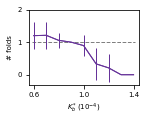

In [33]:
figsize = (5*cm_, 3.5*cm_)
#CF mutant
df_g_0 = group_K_g[group_K_g["germ_band_push"] == 0]
error_style = "errorbar"

fig,ax = plt.subplots(figsize=figsize)

x_col = "K"
y_col = "nb_folds_at_maxBendEnergy"
yerr = "nb_folds_at_maxBendEnergy_std"
ax.plot(df_g_0[x_col], df_g_0[y_col], color = "#663399", label = "+MD, -g", lw = lw ) #lw = 2

if error_style == 'fill_between':
    ax.fill_between(df_g_0[x_col], df_g_0[y_col] - df_g_0[yerr], df_g_0[y_col] + df_g_0[yerr], color = "#663399", alpha = 0.5)            
elif error_style == 'errorbar':
    ax.errorbar(x = df_g_0[x_col], y = df_g_0[y_col], xerr = 0, yerr = df_g_0[yerr], color = "#663399", lw = lw)
    
ax.axhline(y = 1, xmin = 0.03, xmax = 0.97, color = "gray", linestyle = "--", lw = lw, zorder = 0)

xticks = np.array([0.6, 1.0, 1.4])*1e-4
yticks = [0, 1, 2]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([str(np.round(x/(1e-4),1)) for x in xticks], fontsize = Medium_font_size)
ax.set_yticklabels([str(x) for x in yticks], fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel("# folds", fontsize = Medium_font_size) #labelpad = Medium_font_size
ax.set_xlabel(r"$K_b^{*}$" + " " + r"$(10^{-4})$", fontsize = Medium_font_size) #labelpad= Medium_font_size 
#ax.legend(fontsize = Medium_font_size, ncol = 2, loc = "upper center")

#plt.gcf().set_size_inches(3*cm, 2*cm)

os.makedirs("plots/", exist_ok=True)
plt.savefig("plots/CFM_nb_folds_vs_K.pdf", bbox_inches = "tight")

At $K_b^{*} = 10^{-4}$, how does number of folds compare between double mutant(-MD) and CF mutant(+MD).

We see higher number of folds in presence of MD. 

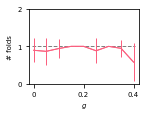

In [34]:
#try this for 1.1e-4 and 1.2e-4

figsize = (5*cm_, 3.5*cm_)
#CF mutant
K = 1e-4
df_K = group_K_g[group_K_g["K"] == K]
df_all_K = grouped_df[grouped_df["K"] == K]
#double mutant
df_K_double_mutant = group_K_g_double_mutant[group_K_g_double_mutant["K"] == K]
df_all_K_double_mutant = grouped_df_double_mutant[grouped_df_double_mutant["K"] == K]
error_style = "errorbar"

fig,ax = plt.subplots(figsize=figsize)

x_col = "germ_band_push"
y_col = "nb_folds_at_maxBendEnergy"
yerr = "nb_folds_at_maxBendEnergy_std"
ax.plot(df_K[x_col], df_K[y_col], color = "#FB607F", label = "+MD", lw =lw) #lw = 2
#double mutant
#ax.plot(df_K_double_mutant[x_col], df_K_double_mutant[y_col], color = "#3EB488", label = "-MD", lw =lw) #lw = 2

if error_style == 'fill_between':
    ax.fill_between(df_K[x_col], df_K[y_col] - df_K[yerr], df_K[y_col] + df_K[yerr], color = "#FB607F", alpha = 0.5)            
    #ax.fill_between(df_K_double_mutant[x_col], df_K_double_mutant[y_col] - df_K_double_mutant[yerr], df_K_double_mutant[y_col] + df_K_double_mutant[yerr], color = "gray", alpha = 0.5)            
elif error_style == 'errorbar':
    ax.errorbar(x = df_K[x_col], y = df_K[y_col], xerr = 0, yerr = df_K[yerr], color = "#FB607F",lw = lw)
    #ax.errorbar(x = df_K_double_mutant[x_col], y = df_K_double_mutant[y_col], xerr = 0, yerr = df_K_double_mutant[yerr], color = "#3EB488",lw = lw)

ax.axhline(y = 1, xmin = 0.03, xmax = 0.97, color = "gray", linestyle = "--", lw = 1, zorder = 0)

xticks = [0,0.2,0.4]
yticks = [0, 1, 2]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize = Medium_font_size)
ax.set_yticklabels([str(x) for x in yticks], fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel("# folds", fontsize = Medium_font_size) #labelpad = Medium_font_size
ax.set_xlabel(r"$g$", fontsize = Medium_font_size) #labelpad= Medium_font_size 
#ax.legend(fontsize = Medium_font_size, ncol = 2, loc = "upper center")

#plt.gcf().set_size_inches(3*cm, 2*cm)

os.makedirs("plots/", exist_ok=True)
plt.savefig("plots/CFM_nb_folds_vs_g.pdf", bbox_inches = "tight")

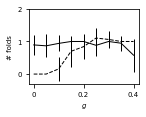

In [35]:
#try this for 1.1e-4 and 1.2e-4

figsize = (5*cm_, 3.5*cm_)
#CF mutant
K = 1e-4
df_K = group_K_g[group_K_g["K"] == K]
df_all_K = grouped_df[grouped_df["K"] == K]
#double mutant
df_K_double_mutant = group_K_g_double_mutant[group_K_g_double_mutant["K"] == K]
df_all_K_double_mutant = grouped_df_double_mutant[grouped_df_double_mutant["K"] == K]
error_style = "errorbar"

fig,ax = plt.subplots(figsize=figsize)

x_col = "germ_band_push"
y_col = "nb_folds_at_maxBendEnergy"
yerr = "nb_folds_at_maxBendEnergy_std"
#ax.plot(df_K[x_col], df_K[y_col], color = "black", label = "+MD", lw =lw, linestyle = "-") #lw = 2
#double mutant
#ax.plot(df_K_double_mutant[x_col], df_K_double_mutant[y_col], color = "black", label = "-MD", lw =lw, linestyle = "--") #lw = 2

if error_style == 'fill_between':
    ax.fill_between(df_K[x_col], df_K[y_col] - df_K[yerr], df_K[y_col] + df_K[yerr], color = "#FB607F", alpha = 0.5)            
    ax.fill_between(df_K_double_mutant[x_col], df_K_double_mutant[y_col] - df_K_double_mutant[yerr], df_K_double_mutant[y_col] + df_K_double_mutant[yerr], color = "gray", alpha = 0.5)            
elif error_style == 'errorbar':
    ax.errorbar(x = df_K[x_col], y = df_K[y_col], xerr = 0, yerr = df_K[yerr], color = "black",lw = lw, linestyle = "-")
    ax.errorbar(x = df_K_double_mutant[x_col], y = df_K_double_mutant[y_col], xerr = 0, yerr = df_K_double_mutant[yerr], color = "black",lw = lw, linestyle = "--")

#ax.axhline(y = 1, xmin = 0.03, xmax = 0.97, color = "gray", linestyle = "--", lw = 1, zorder = 0)

xticks = [0,0.2,0.4]
yticks = [0, 1, 2]
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize = Medium_font_size)
ax.set_yticklabels([str(x) for x in yticks], fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel("# folds", fontsize = Medium_font_size) #labelpad = Medium_font_size
ax.set_xlabel(r"$g$", fontsize = Medium_font_size) #labelpad= Medium_font_size 
#ax.legend(fontsize = Medium_font_size, ncol = 2, loc = "upper center")

#plt.gcf().set_size_inches(3*cm, 2*cm)

os.makedirs("plots/", exist_ok=True)
plt.savefig("plots/DM_CFM_nb_folds_vs_g_bw.pdf", bbox_inches = "tight")

# Timing of folds

For CF mutant at $K_b^{*} = 10^{-4}$, we don't see a change in the number of folds for different values of $g$.

However,we see that for low values of $g$, it takes longer for the folds to appear. 

Thus in absence of $g$ and only with MD, we will see folds but at longer waiting times.

We can also see that in absence of MD, it takes longer for folds to appear.

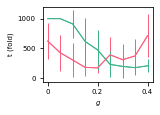

In [36]:
#try this for 1.1e-4 and 1.2e-4

figsize = (5*cm_, 3.5*cm_)

#CF mutant
K = 1e-4
df_K = group_K_g[group_K_g["K"] == K]
df_all_K = grouped_df[grouped_df["K"] == K]
#double mutant
df_K_double_mutant = group_K_g_double_mutant[group_K_g_double_mutant["K"] == K]
df_all_K_double_mutant = grouped_df_double_mutant[grouped_df_double_mutant["K"] == K]
error_style = "errorbar"

fig,ax = plt.subplots(figsize=figsize)

x_col = "germ_band_push"
y_col = "t_at_maxBendEnergy"
yerr = "t_at_maxBendEnergy_std"
ax.plot(df_K[x_col], df_K[y_col], color = "#FB607F", label = "+MD", lw =lw) #lw = 2
#double mutant
ax.plot(df_K_double_mutant[x_col], df_K_double_mutant[y_col], color = "#3EB488", label = "-MD", lw =lw) #lw = 2

if error_style == 'fill_between':
    ax.fill_between(df_K[x_col], df_K[y_col] - df_K[yerr], df_K[y_col] + df_K[yerr], color = "#FB607F", alpha = 0.5)            
    #ax.fill_between(df_K_double_mutant[x_col], df_K_double_mutant[y_col] - df_K_double_mutant[yerr], df_K_double_mutant[y_col] + df_K_double_mutant[yerr], color = "gray", alpha = 0.5)            
elif error_style == 'errorbar':
    ax.errorbar(x = df_K[x_col], y = df_K[y_col], xerr = 0, yerr = df_K[yerr], color = "#FB607F",lw = lw)
    ax.errorbar(x = df_K_double_mutant[x_col], y = df_K_double_mutant[y_col], xerr = 0, yerr = df_K_double_mutant[yerr], color = "#3EB488",lw = lw)

#ax.axhline(y = 1, xmin = 0.03, xmax = 0.97, color = "gray", linestyle = "--", lw = 1, zorder = 0)

xticks = [0,0.2,0.4]
#yticks = [0, 1, 2]
ax.set_xticks(xticks)
#ax.set_yticks(yticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize = Medium_font_size)
#ax.set_yticklabels([str(x) for x in yticks], fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel("t (fold)", fontsize = Medium_font_size) #labelpad = Medium_font_size
ax.set_xlabel(r"$g$", fontsize = Medium_font_size) #labelpad= Medium_font_size 
#ax.legend(fontsize = Medium_font_size, ncol = 2, loc = "upper center")

#plt.gcf().set_size_inches(3*cm, 2*cm)

os.makedirs("plots/", exist_ok=True)
plt.savefig("plots/CFM_t_maxBendEnergy_vs_g.pdf", bbox_inches = "tight")

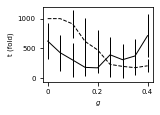

In [37]:
#try this for 1.1e-4 and 1.2e-4

figsize = (5*cm_, 3.5*cm_)

#CF mutant
K = 1e-4
df_K = group_K_g[group_K_g["K"] == K]
df_all_K = grouped_df[grouped_df["K"] == K]
#double mutant
df_K_double_mutant = group_K_g_double_mutant[group_K_g_double_mutant["K"] == K]
df_all_K_double_mutant = grouped_df_double_mutant[grouped_df_double_mutant["K"] == K]
error_style = "errorbar"

fig,ax = plt.subplots(figsize=figsize)

x_col = "germ_band_push"
y_col = "t_at_maxBendEnergy"
yerr = "t_at_maxBendEnergy_std"
#ax.plot(df_K[x_col], df_K[y_col], color = "#FB607F", label = "+MD", lw =lw) #lw = 2
#double mutant
#ax.plot(df_K_double_mutant[x_col], df_K_double_mutant[y_col], color = "#3EB488", label = "-MD", lw =lw) #lw = 2

if error_style == 'fill_between':
    ax.fill_between(df_K[x_col], df_K[y_col] - df_K[yerr], df_K[y_col] + df_K[yerr], color = "#FB607F", alpha = 0.5)            
    #ax.fill_between(df_K_double_mutant[x_col], df_K_double_mutant[y_col] - df_K_double_mutant[yerr], df_K_double_mutant[y_col] + df_K_double_mutant[yerr], color = "gray", alpha = 0.5)            
elif error_style == 'errorbar':
    ax.errorbar(x = df_K[x_col], y = df_K[y_col], xerr = 0, yerr = df_K[yerr], color = "black",lw = lw, linestyle = "-")
    ax.errorbar(x = df_K_double_mutant[x_col], y = df_K_double_mutant[y_col], xerr = 0, yerr = df_K_double_mutant[yerr], color = "black",lw = lw, linestyle = "--")

#ax.axhline(y = 1, xmin = 0.03, xmax = 0.97, color = "gray", linestyle = "--", lw = 1, zorder = 0)

xticks = [0,0.2,0.4]
#yticks = [0, 1, 2]
ax.set_xticks(xticks)
#ax.set_yticks(yticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize = Medium_font_size)
#ax.set_yticklabels([str(x) for x in yticks], fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel("t (fold)", fontsize = Medium_font_size) #labelpad = Medium_font_size
ax.set_xlabel(r"$g$", fontsize = Medium_font_size) #labelpad= Medium_font_size 
#ax.legend(fontsize = Medium_font_size, ncol = 2, loc = "upper center")

#plt.gcf().set_size_inches(3*cm, 2*cm)

os.makedirs("plots/", exist_ok=True)
plt.savefig("plots/CFM_t_maxBendEnergy_vs_g_bw.pdf", bbox_inches = "tight")

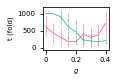

In [38]:
#try this for 1.1e-4 and 1.2e-4

figsize = (3*cm_, 2*cm_)
lw = 0.5
#CF mutant
K = 1e-4
df_K = group_K_g[group_K_g["K"] == K]
df_all_K = grouped_df[grouped_df["K"] == K]
#double mutant
df_K_double_mutant = group_K_g_double_mutant[group_K_g_double_mutant["K"] == K]
df_all_K_double_mutant = grouped_df_double_mutant[grouped_df_double_mutant["K"] == K]
error_style = "errorbar"

fig,ax = plt.subplots(figsize=figsize)

x_col = "germ_band_push"
y_col = "t_at_maxBendEnergy"
yerr = "t_at_maxBendEnergy_std"
ax.plot(df_K[x_col], df_K[y_col], color = "#FB607F", label = "+MD", lw =lw) #lw = 2
#double mutant
ax.plot(df_K_double_mutant[x_col], df_K_double_mutant[y_col], color = "#3EB488", label = "-MD", lw =lw) #lw = 2

if error_style == 'fill_between':
    ax.fill_between(df_K[x_col], df_K[y_col] - df_K[yerr], df_K[y_col] + df_K[yerr], color = "#FB607F", alpha = 0.5)            
    ax.fill_between(df_K_double_mutant[x_col], df_K_double_mutant[y_col] - df_K_double_mutant[yerr], df_K_double_mutant[y_col] + df_K_double_mutant[yerr], color = "gray", alpha = 0.5)            
elif error_style == 'errorbar':
    ax.errorbar(x = df_K[x_col], y = df_K[y_col], xerr = 0, yerr = df_K[yerr], color = "#FB607F",lw = lw)
    ax.errorbar(x = df_K_double_mutant[x_col], y = df_K_double_mutant[y_col], xerr = 0, yerr = df_K_double_mutant[yerr], color = "#3EB488",lw = lw)

#ax.axhline(y = 1, xmin = 0.03, xmax = 0.97, color = "gray", linestyle = "--", lw = 1, zorder = 0)

xticks = [0,0.2,0.4]
#yticks = [0, 1, 2]
ax.set_xticks(xticks)
#ax.set_yticks(yticks)
ax.set_xticklabels([str(x) for x in xticks], fontsize = Medium_font_size)
#ax.set_yticklabels([str(x) for x in yticks], fontsize = Medium_font_size)
ax.tick_params(axis='both', which='major', labelsize=Medium_font_size)
ax.set_ylabel("t (fold)", fontsize = Medium_font_size) #labelpad = Medium_font_size
ax.set_xlabel(r"$g$", fontsize = Medium_font_size) #labelpad= Medium_font_size 
#ax.legend(fontsize = Medium_font_size, ncol = 2, loc = "upper center")

#plt.gcf().set_size_inches(3*cm, 2*cm)

os.makedirs("plots/", exist_ok=True)
plt.savefig("plots/DM_CFM_t_maxBendEnergy_vs_g.pdf", bbox_inches = "tight")

# Number of folds vs bend energy

We observe that number of folds don't change considerably after a peak in the bend energy is achieved. 

Moreover, the fold starts slowing after this timepoint.

Hence we take this peak as the time at which we analyse all simulations.

- Single curves for three different randomly chosen simulation that have folds at least 1 
- First we show mean values

In [30]:
def helper_plot_tissue(ax, df_timepoint, alpha, lw = 1, plot_vit = True, label = None, title = None):
    

    #plot segments
    points_1 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[:-1]
    points_2 = np.array(df_timepoint[['x', 'y']]).reshape(-1, 1, 2)[1:]
    #create a collection of lines
    segments_demo = np.concatenate([points_1, points_2], axis = 1)
    #value by which to color lines
    #dydx = df_timepoint["d_r_mod"][:-1]/df_timepoint["dr0"][:-1]
    colors = np.where(df_timepoint["mitotic_domain_id"] == -1, "#373f51", "#ff6978")
    #make line collection
    #lc = LineCollection(segments_demo, array = dydx,cmap=cmap, norm=norm,alpha = alpha,lw = lw,)
    lc = LineCollection(segments_demo, colors =colors,alpha = alpha,linewidths=lw, label = label)
    line = ax.add_collection(lc)
    
    if plot_vit:
        thetas = np.linspace(0, np.pi, 1000)
        vit_x = np.cos(thetas)
        vit_y = 0.4*np.sin(thetas)
        ax.plot(1.02*vit_x, 1.02*vit_y, lw = lw, alpha = 1, color = "#d7d8dc", zorder = 0)
    
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    if title is not None: ax.set_title(title, fontsize = Medium_font_size)

    return(ax)

def helper_plot_qty_vs_time(ax, df, xname, yname, yname_std = None, xlim = None, ylim = None, lw = 1,
                            title = None, yticks = None, yticklabels = None, xticks = None, xticklabels = None, set_xscale_log = True,
                            axvline_xloc = None, axvline_color = "blue",
                            
                           ):
    if xlim is not None : ax.set_xlim(xlim)
    if ylim is not None : ax.set_ylim(ylim)
    ax.plot(df[xname], df[yname],color = "black")   
    if yname_std is not None:
        ax.fill_between(df[xname], 
                df[yname] - df[yname_std],
                df[yname] + df[yname_std],
                alpha = 0.5, color = "gray"
               )
    if title is not None: ax.set_title(title, fontsize = Medium_font_size)
    if set_xscale_log: ax.set_xscale("log")
    if yticks is not None: ax.set_yticks(yticks)
    if yticklabels is not None: ax.set_yticklabels(yticklabels, fontsize = Medium_font_size)
    if xticks is not None: ax.set_xticks(xticks)
    if xticklabels is not None: ax.set_xticklabels(xticklabels, fontsize = Medium_font_size)
    if xlabel is not None: ax.set_xlabel(xlabel, fontsize = Medium_font_size)
        
    if axvline_xloc is not None: ax.axvline(x = axvline_xloc, color = axvline_color, lw = lw, linestyle = '--')
    
    return(ax)

K_9e-05_seed_1178_germ_band_push_0.2_noise_scale_1e-05_dt_1e-05_t_final_1000.0/


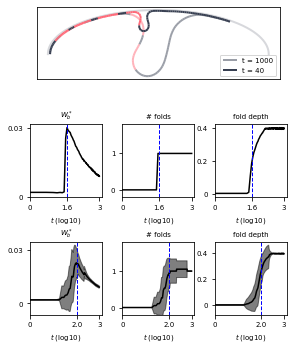

In [37]:
seed = 100 #100 is quite good
np.random.seed(seed)
path = np.random.choice(grouped_df.query("nb_folds_at_maxBendEnergy == 1")["path"])
print(path)
t_at_maxBendEnergy = grouped_df.query("path == @path").t_at_maxBendEnergy.values[0]
t_at_final = 1000 #grouped_df.query("path == @path").t_at_final.values[0]
germ_band_push = grouped_df.query("path == @path").germ_band_push.values[0]
K = grouped_df.query("path == @path").K.values[0]
single_sim_energy = df_energy_all.query("path == @path")
single_sim_at_maxBendEnergy = allSims_at_maxBendEnergy.query("path == @path")
single_sim_at_final = allSims_at_final.query("path == @path")

figsize = (10*cm_, 12*cm_)
#title = r"$K_b^{*} = $" + str(K) + " g"
set_xscale_log = True
if set_xscale_log: 
    xticks = [1, t_at_maxBendEnergy, 1000]
    xticklabels = ['0', str(np.round(np.log10(t_at_maxBendEnergy),1)), '3']
    xlabel = r"$t$"+ " (log10)"
else:
    xticks = [0,1000]
    xticklabels = [str(x) for x in xticks]
    xlabel = r"$t$"

fig, axd = plt.subplot_mosaic([['top','top', 'top'],
                               ['center left', 'center center', 'center right'],
                               ['lower left', 'lower center', 'lower right']
                              ],
                              figsize=figsize, )

####
# Plotting shape
####

ax = axd["top"]
ax = helper_plot_tissue(ax, single_sim_at_final, alpha = 0.5, lw = 2, plot_vit = False, label = f"t = 1000")
ax = helper_plot_tissue(ax, single_sim_at_maxBendEnergy, alpha = 1, lw = 2, label = f"t = {int(t_at_maxBendEnergy)}")
ax.legend(fontsize = Medium_font_size, loc = "lower right")

####
# Plotting energy and fold dynamics vs time
####
ax = axd["center left"]
yticks = [0, max(single_sim_energy["bend_energy_normalized"])]
ax = helper_plot_qty_vs_time(ax, single_sim_energy, xname = "t", yname = "bend_energy_normalized", 
                             xticks = xticks, xticklabels=xticklabels, 
                             yticks = yticks, yticklabels=[str(np.round(x,2)) for x in yticks],
                             set_xscale_log = set_xscale_log, title = r"$W_b^*$",
                             axvline_xloc = t_at_maxBendEnergy, axvline_color = "blue"
                            )

ax = axd["center center"]
yticks = [0, 1]
ylim = (-0.2,1.8)
ax = helper_plot_qty_vs_time(ax, single_sim_energy, xname = "t", yname = "nb_folds",
                             xticks = xticks, xticklabels=xticklabels,
                             yticks = yticks, yticklabels=[str(x) for x in yticks],ylim = ylim,
                             set_xscale_log = set_xscale_log, title = r"# folds",
                             axvline_xloc = t_at_maxBendEnergy, axvline_color = "blue"
                            )
ax = axd["center right"]
yticks = [0, max(single_sim_energy["max_depth"])/2, max(single_sim_energy["max_depth"])]
ax = helper_plot_qty_vs_time(ax, single_sim_energy, xname = "t", yname = "max_depth",
                             xticks = xticks, xticklabels=xticklabels,
                             yticks = yticks, yticklabels=[str(np.round(x,1)) for x in yticks],
                             set_xscale_log = set_xscale_log, title = r"fold depth",
                             axvline_xloc = t_at_maxBendEnergy, axvline_color = "blue"
                            )

####
# Plotting averages
####
df_averaged_temp = grouped_energy_df.query(f"K == @K and germ_band_push == @germ_band_push")
#update the location of max Bend energy
t_at_maxBendEnergy = df_averaged_temp[df_averaged_temp["bend_energy_normalized_mean"] == max(df_averaged_temp["bend_energy_normalized_mean"])].t.values[0]
#update xticks
if set_xscale_log: 
    xticks = [1, t_at_maxBendEnergy, 1000]
    xticklabels = ['0', str(np.round(np.log10(t_at_maxBendEnergy),1)), '3']
    xlabel = r"$t$"+ " (log10)"
else:
    xticks = [0,1000]
    xticklabels = [str(x) for x in xticks]
    xlabel = r"$t$"
    
ax = axd["lower left"]
yticks = [0, max(single_sim_energy["bend_energy_normalized"])]
ax = helper_plot_qty_vs_time(ax, df_averaged_temp, xname = "t", yname = "bend_energy_normalized_mean", yname_std = "bend_energy_normalized_std",
                             xticks = xticks, xticklabels=xticklabels, 
                             yticks = yticks, yticklabels=[str(np.round(x,2)) for x in yticks],
                             set_xscale_log = set_xscale_log, title = r"$W_b^*$",
                             axvline_xloc = t_at_maxBendEnergy, axvline_color = "blue"
                            )

ax = axd["lower center"]
yticks = [0, 1]
ylim = (-0.2,1.8)
ax = helper_plot_qty_vs_time(ax, df_averaged_temp, xname = "t", yname = "nb_folds_mean",yname_std = "nb_folds_std",
                             xticks = xticks, xticklabels=xticklabels,
                             yticks = yticks, yticklabels=[str(x) for x in yticks],ylim = ylim,
                             set_xscale_log = set_xscale_log, title = r"# folds",
                             axvline_xloc = t_at_maxBendEnergy, axvline_color = "blue"
                            )
ax = axd["lower right"]
yticks = [0, max(single_sim_energy["max_depth"])/2, max(single_sim_energy["max_depth"])]
ax = helper_plot_qty_vs_time(ax, df_averaged_temp, xname = "t", yname = "max_depth_mean",yname_std = "max_depth_std",
                             xticks = xticks, xticklabels=xticklabels,
                             yticks = yticks, yticklabels=[str(np.round(x,1)) for x in yticks],
                             set_xscale_log = set_xscale_log, title = r"fold depth",
                             axvline_xloc = t_at_maxBendEnergy, axvline_color = "blue"
                            )

fig.tight_layout(pad = 0.2,) 